From [A Comprehensive Introduction to Graph Neural Networks (GNNs)](https://www.datacamp.com/tutorial/comprehensive-introduction-graph-neural-networks-gnns-tutorial)

# Graph Neural Networks

We will use the [Jazz Musicians Network](https://datarepository.wolframcloud.com/resources/Jazz-Musicians-Network) dataset. It contains 198 nodes and 2742 edges. In the community graph plot below, different colors of nodes represent various communities of Jazz musicians and the edges connecting them. There is a web of collaboration where a single musician has relationships within and outside the community.

![Jazz Community Plot](./images/jazz_community_plot.png)

Graphs are excellent in dealing with complex problems with relationships and interactions. They are used in pattern recognition, social networks analysis, recommendation systems, and semantic analysis. Creating graph-based solutions is a whole new field that offers rich insights into complex and interlinked datasets.

We will first use NetworkX to create a simple graph.

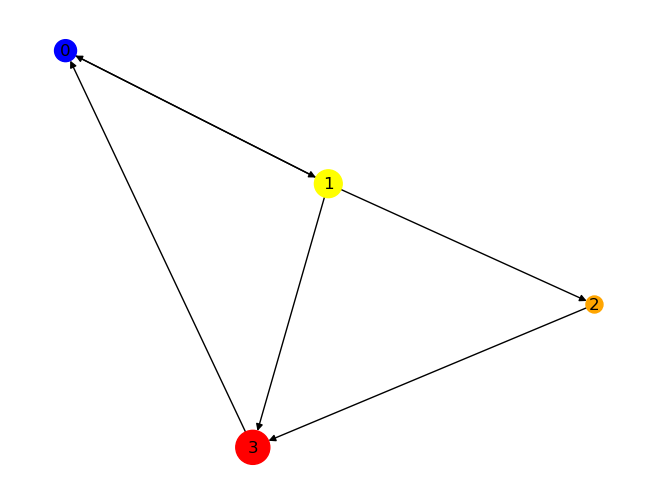

In [1]:
import networkx as nx
H = nx.DiGraph()

#adding nodes
H.add_nodes_from([
  (0, {"color": "blue", "size": 250}),
  (1, {"color": "yellow", "size": 400}),
  (2, {"color": "orange", "size": 150}),
  (3, {"color": "red", "size": 600})
])

#adding edges
H.add_edges_from([
  (0, 1),
  (1, 2),
  (1, 0),
  (1, 3),
  (2, 3),
  (3,0)
])

node_colors = nx.get_node_attributes(H, "color").values()
colors = list(node_colors)
node_sizes = nx.get_node_attributes(H, "size").values()
sizes = list(node_sizes)

# Plotting Graph
nx.draw(H, with_labels=True, node_color=colors, node_size=sizes)

Next, we will convert the data from directional to an undirectional graph using the `to_undirected()` function.

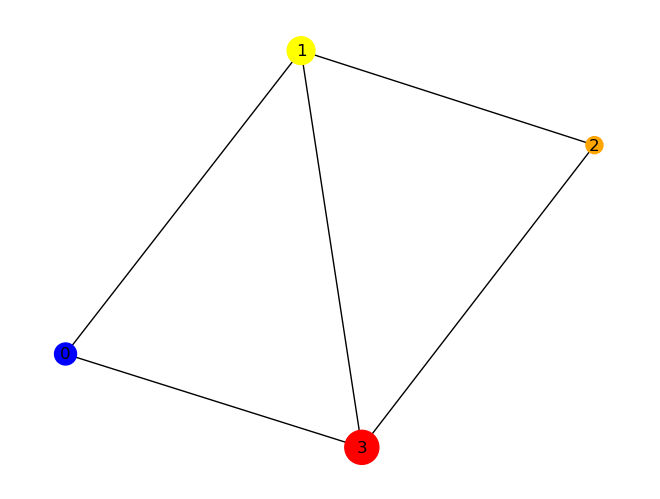

In [2]:
# Converting to undirected graph
G = H.to_undirected()
nx.draw(G, with_labels=True, node_color=colors, node_size=sizes)

## Why is it Hard to Analyze a Graph?

Graph-based data structures have drawbacks, and data scientists must understand them before developing graph-based solutions.

1. A graph exists in non-euclidean space. It does not exist in 2D or 3D space, which makes it harder to interpret the data. To visualize the structure in 2D space, you must use various dimensionality reduction tools.
2. Graph are dynamic; they do not have a fixed form. There can be two visually different graphs, but they might have similar adjacency matrix representations. It makes it difficult for us to analyze data using traditional statistical tools.
3. Large size and dimensionality will increase the graph's complexity for human interpretations. The dense structure with multiple nodes and thousands of edges is harder to understand and extract insights.

## What is a Graph Neural Network (GNN)?

Graph Neural Networks are special types of neural networks capable of working with a graph data structure. They are highly influenced by Convolutional Neural Networks (CNNs) and graph embedding. GNNs are used in predicting nodes, edges, and graph-based tasks. 

* **CNNs** are used for image classification. Similarly, GNNs are applied to graph structure (grid of pixels) to predict a class. 
* **Recurrence** Neural Networks are used in text classification. Similarly, GNNs are applied to graph structures where every word is a node in a sentence.  

GNNs were introduced when Convolutional Neural Networks failed to achieve optimal results due to the arbitrary size of the graph and complex structure. 

![GNN Architecture](./images/gnn_architecture_01.png)

An input graph is passed through a series of neural networks. The input graph structure is converted into graph embedding, allowing us to maintain information on nodes, edges, and global context.

Then the feature vector of nodes A and C is passed through the neural network layer. It aggregates these features and passes them to the next layer.

## Types of Graph Neural Network Tasks

* **Graph Classification**: we use this to classify graphs into various categories. Its applications are social network analysis and text classification. 
* **Node Classification**: this task uses neighboring node labels to predict missing node labels in a graph. 
* **Link Prediction**: predicts the link between a pair of nodes in a graph with an incomplete adjacency matrix. It is commonly used for social networks. 
* **Community Detection**: divides nodes into various clusters based on edge structure. It learns from edge weights, and distance and graph objects similarly. 
* **Graph Embedding**: maps graphs into vectors, preserving the relevant information on nodes, edges, and structure.
* **Graph Generation**: learns from sample graph distribution to generate a new but similar graph structure. 

![GNN Tasks](./images/gnn_tasks.png)

## Disadvantages of Graph Neural Networks

There are a few drawbacks to using GNNs. Understanding them will help us determine when to use a GNN and how to optimize the performance of our machine learning models.

1. Most neural networks can go deep to obtain better performance, whereas GNNs are **shallow networks** mostly with three layers. It limits us from achieving state-of-the-art performance on large datasets.
2. The **graph structures are constantly changing**, making it harder to train a model on it.
3. Deploying the model to production faces **scalability issues** as these networks are computationally expensive. If you have a large and complex graph structure, it will be hard for you to scale the GNNs in production.

## What is a Graph Convolutional Network (GCN)?

The majority of GNNs are Graph Convolutional Networks, and it is important to learn about them before jumping into a node classification tutorial.

The **convolution** in a GRN is the same as a convolution in convolutional neural netowrks. It multiplies neurons with weights (filters) to learn from data features.

It acts as sliding windows on whole images to learn features from neighboring cells. The filter uses weight sharing to learn various facial features in image recognition systems.

Now transfer the same functionality to Graph Convolutional Networks where a model learns the features from neighboring nodes. The major difference between GCN and CNN is that it is developed to work on non-euclidean data structures where the order of nodes and edges can vary.

There are two types of GCNs:
* **Spatial Graph Convolutional Networks** use spatial features to learn from graphs that are located in spatial space.
* **Spectral Graph Convolutional Networks** use Eigen-decomposition of graph Laplacian matrix for information propagation along nodes.

## How do GNNs work? Building a Graph Neural Network with PyTorch

We will use the citation network dataset from Cora. the **nodes** are documents with 1433-dimensional bag-of-words feature vectors, and the **edges** are citation links between research papers. There are 7 classes, and we will train the model to predict missing labels.

We will ingest the Planetoid Cora dataset, and **row normalize** the bag of words input features. After that, we will analyze the dataset and the first graph object.

In [3]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='./data/', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.
print(data)

/home/emoeller/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/torch_cluster/nearest.py:3: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.4.1)
  import scipy.cluster
/home/emoeller/miniconda3/envs/pytorch_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


The Cora dataset has 2708 nodes, 10,566 edges, 1,433 features, and 7 classes. The first object has 2708 train, validation, and test masks. We will use these masks to train and evaluate the model.

### Node Classification with GNN

We will create a GCN model structure that contains two `GCNConv` layers, ReLU activation, and a dropout rate of 0.5. The model consists of 16 hidden channels.

**GCN layer:**

$$x_{v}^{(\ell + 1)} = W^{(\ell + 1)} \sum_{w\in\mathcal{N}(v)\cup\{v\}}\frac{1}{c_{w,v}}\cdot x^{(\ell)}_{w}$$

The $W(\ell+1)$ is a trainable weight matrix in the above equation and $C_{w,v}$ denotes to a fixed normalization coefficient for each edge. This is usually the square roots of the number of edges for the source and target nodes.

In [4]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x
    
model = GCN(hidden_channels=16)
print(model)
        

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


### Visualizing the Untrained GCN Network

Let's visualize node embeddings of untrained GCN networks using `sklearn.manifold.TSNE` and `matplotlib.pyplot`. It will plot a 7 dimensional node embedding to a 2D scatter plot.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=35, c=color, cmap="Set2")
    plt.show()

We will evaluate the model then add training data to the untrained model to visualize various nodes and categories.

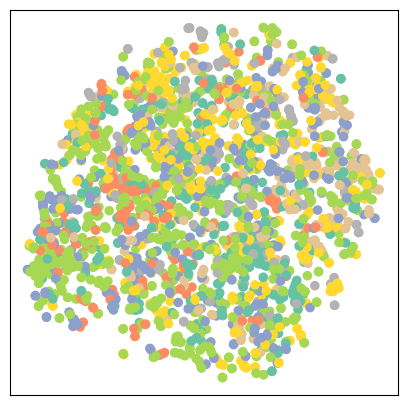

In [6]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

### Training GNN

We will train our model on 100 Epochs using **Adam** optimization and the **Cross-Entropy Loss** function.

**In the train function, we have:**
1. Clear the gradient
2. Perform a single forward pass
3. Compute loss using the training nodes
4. Calculate gradient, and update the parameters

**In the test function, we have:**
1. Predicted node class
2. Extracted class label with the highest probability
3. Checked how many values have been predicted correctly
4. Creating accuracy ratio using a sum of correct predictions divided by a total number of nodes

In [48]:
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

outputs = []
losses = []
accuracies = []

def accuracy(pred, labels):
    return (pred == labels).sum().item() / len(labels)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    outputs.append(out)
    losses.append(loss.item())
    return loss.item()

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    accuracies.append(accuracy(out[data.test_mask].argmax(dim=1), data.y[data.test_mask]))
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        correct = (out[mask].argmax(dim=1) == data.y[mask]).sum()
        acc = int(correct) / int(mask.sum())
        accs.append(acc)
    return accs

for epoch in range(1, 201):
    loss = train()
    train_acc, val_acc, test_acc = test()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 010, Loss: 1.8685, Train Acc: 0.6857, Val Acc: 0.4560, Test Acc: 0.4470
Epoch: 020, Loss: 1.7310, Train Acc: 0.8857, Val Acc: 0.6320, Test Acc: 0.6560
Epoch: 030, Loss: 1.5576, Train Acc: 0.9429, Val Acc: 0.7220, Test Acc: 0.7210
Epoch: 040, Loss: 1.3258, Train Acc: 0.9714, Val Acc: 0.7620, Test Acc: 0.7800
Epoch: 050, Loss: 1.1296, Train Acc: 0.9571, Val Acc: 0.7600, Test Acc: 0.7940
Epoch: 060, Loss: 0.9741, Train Acc: 0.9643, Val Acc: 0.7680, Test Acc: 0.8000
Epoch: 070, Loss: 0.7711, Train Acc: 0.9643, Val Acc: 0.7700, Test Acc: 0.8070
Epoch: 080, Loss: 0.6755, Train Acc: 0.9786, Val Acc: 0.7800, Test Acc: 0.8130
Epoch: 090, Loss: 0.6535, Train Acc: 0.9786, Val Acc: 0.7780, Test Acc: 0.8130
Epoch: 100, Loss: 0.5799, Train Acc: 0.9857, Val Acc: 0.7780, Test Acc: 0.8150
Epoch: 110, Loss: 0.5377, Train Acc: 0.9857, Val Acc: 0.7900, Test Acc: 0.8160
Epoch: 120, Loss: 0.4883, Train Acc: 0.9857, Val Acc: 0.7820, Test Acc: 0.8150
Epoch: 130, Loss: 0.4183, Train Acc: 0.9857, Val Acc

We will now visualize the output embedding of a trained model to verify the results

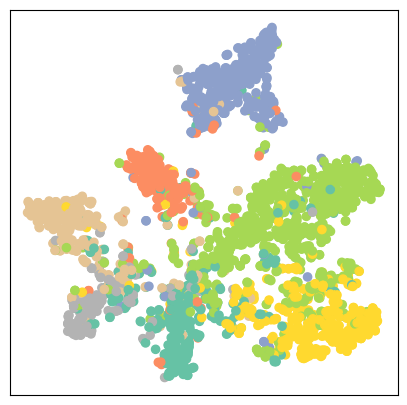

In [46]:
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [47]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.decomposition import PCA

# choose epochs to animate
epochs_per_frame = 10
frames = list(range(0, len(outputs), epochs_per_frame))

# ensure numpy arrays [N, D]
X_list = []
for i in frames:
    Xi = outputs[i]
    if torch.is_tensor(Xi):
        Xi = Xi.detach().cpu().numpy()
    X_list.append(Xi)

N = data.num_nodes
D = X_list[0].shape[1]
assert all(x.shape == (N, D) for x in X_list), [x.shape for x in X_list[:3]]

# fit one TSNE on concatenated points: [(T*N), D]
X = np.vstack(X_list)

def row_normalize(X, eps=1e-12):
    n = np.linalg.norm(X, axis=1, keepdims=True)
    return X / (n + eps)

X_ref = row_normalize(outputs[frames[-1]].detach().cpu().numpy())
pca = PCA(n_components=2).fit(X_ref)

Z_by_t = [pca.transform(row_normalize(outputs[i].detach().cpu().numpy())) for i in frames]

pad = 0.05  # 5% padding
Z_all = np.vstack(Z_by_t)
xmin, ymin = Z_all.min(axis=0)
xmax, ymax = Z_all.max(axis=0)

dx = xmax - xmin
dy = ymax - ymin

xmin -= pad * dx
xmax += pad * dx
ymin -= pad * dy
ymax += pad * dy

y = data.y.detach().cpu().numpy() if torch.is_tensor(data.y) else np.asarray(data.y)

fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
sc = ax.scatter(Z_by_t[0][:, 0], Z_by_t[0][:, 1], c=y, s=8, cmap="tab10")
title = ax.set_title(f"Epoch {frames[0]}")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

def update(k):
    sc.set_offsets(Z_by_t[k])
    title.set_text(f"Epoch {frames[k]}")
    return sc, title

anim = animation.FuncAnimation(fig, update, frames=len(frames), interval=200, blit=True)
plt.close(fig)
html = HTML(anim.to_html5_video())
display(html)


### Training GATConv Model

In the second, we will replace `GCNConv` with `GATConv` layers. The **Graph Attention Networks** use masked self-attention layers to address the drawbacks of GCNConv and achieve state-of-the-art results.

In the code below, we have just replaced **GCNConv** with **GATConv** with 8 attention heads in the first layer and 1 in the second layer.

We will also set:
* Dropout rate to 0.6
* Hidden channels to 8
* Learning rate to 0.005

We have modified the **test** function to find the accuracy of a specific mask (valid, test). It will help us print out validation and test scores during model training. We are also storing validation adn test results to plot a line chart later.

In [52]:
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(dataset.num_features, hidden_channels,heads)
        self.conv2 = GATConv(heads*hidden_channels, dataset.num_classes,heads)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8, heads=8)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

outputs = []
losses = []
accuracies = []

def train():
      model.train()
      optimizer.zero_grad()
      out = model(data.x, data.edge_index)
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      outputs.append(out)
      losses.append(loss.item())
      return loss.item()

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)
      correct = pred[mask] == data.y[mask]
      acc = int(correct.sum()) / int(mask.sum())
      accuracies.append(acc)
      return acc

val_acc_all = []
test_acc_all = []

for epoch in range(1, 201):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    val_acc_all.append(val_acc)
    test_acc_all.append(test_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

GAT(
  (conv1): GATConv(1433, 8, heads=8)
  (conv2): GATConv(64, 7, heads=8)
)
Epoch: 001, Loss: 4.0245, Val: 0.3520, Test: 0.3770
Epoch: 002, Loss: 3.9926, Val: 0.4760, Test: 0.5240
Epoch: 003, Loss: 3.9555, Val: 0.5000, Test: 0.5560
Epoch: 004, Loss: 3.9104, Val: 0.5440, Test: 0.5740
Epoch: 005, Loss: 3.8645, Val: 0.5500, Test: 0.5870
Epoch: 006, Loss: 3.8111, Val: 0.5560, Test: 0.5800
Epoch: 007, Loss: 3.7478, Val: 0.5460, Test: 0.5730
Epoch: 008, Loss: 3.6821, Val: 0.5320, Test: 0.5650
Epoch: 009, Loss: 3.6151, Val: 0.5280, Test: 0.5610
Epoch: 010, Loss: 3.5253, Val: 0.5220, Test: 0.5570
Epoch: 011, Loss: 3.4305, Val: 0.5080, Test: 0.5490
Epoch: 012, Loss: 3.3468, Val: 0.5040, Test: 0.5430
Epoch: 013, Loss: 3.2313, Val: 0.4900, Test: 0.5280
Epoch: 014, Loss: 3.1400, Val: 0.4800, Test: 0.5180
Epoch: 015, Loss: 3.0162, Val: 0.4700, Test: 0.5080
Epoch: 016, Loss: 2.9145, Val: 0.4620, Test: 0.4990
Epoch: 017, Loss: 2.7860, Val: 0.4520, Test: 0.4940
Epoch: 018, Loss: 2.6948, Val: 0.4340

In [54]:

# choose epochs to animate
epochs_per_frame = 5
frames = list(range(0, len(outputs), epochs_per_frame))

# ensure numpy arrays [N, D]
X_list = []
for i in frames:
    Xi = outputs[i]
    if torch.is_tensor(Xi):
        Xi = Xi.detach().cpu().numpy()
    X_list.append(Xi)

N = data.num_nodes
D = X_list[0].shape[1]
assert all(x.shape == (N, D) for x in X_list), [x.shape for x in X_list[:3]]

# fit one TSNE on concatenated points: [(T*N), D]
X = np.vstack(X_list)

def row_normalize(X, eps=1e-12):
    n = np.linalg.norm(X, axis=1, keepdims=True)
    return X / (n + eps)

X_ref = row_normalize(outputs[frames[-1]].detach().cpu().numpy())
pca = PCA(n_components=2).fit(X_ref)

Z_by_t = [pca.transform(row_normalize(outputs[i].detach().cpu().numpy())) for i in frames]

pad = 0.05  # 5% padding
Z_all = np.vstack(Z_by_t)
xmin, ymin = Z_all.min(axis=0)
xmax, ymax = Z_all.max(axis=0)

dx = xmax - xmin
dy = ymax - ymin

xmin -= pad * dx
xmax += pad * dx
ymin -= pad * dy
ymax += pad * dy

y = data.y.detach().cpu().numpy() if torch.is_tensor(data.y) else np.asarray(data.y)

fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
sc = ax.scatter(Z_by_t[0][:, 0], Z_by_t[0][:, 1], c=y, s=8, cmap="tab10")
title = ax.set_title(f"Epoch {frames[0]}")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

def update(k):
    sc.set_offsets(Z_by_t[k])
    title.set_text(f"Epoch {frames[k]}")
    return sc, title

anim = animation.FuncAnimation(fig, update, frames=len(frames), interval=200, blit=True)
plt.close(fig)
html = HTML(anim.to_html5_video())
display(html)

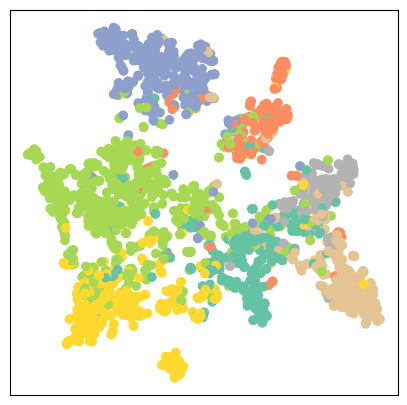

In [55]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)